In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt

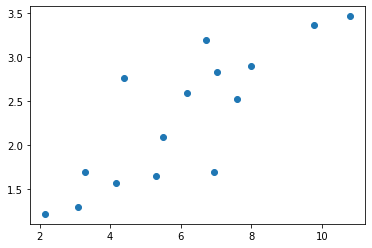

In [2]:
# Create a toy dataset
x_np = np.array([[3.3], [4.4], [5.5], [6.71], [6.93], [4.168], [9.779], [6.182], [7.59],
                 [2.167], [7.042], [10.791], [5.313], [7.997], [3.1]], dtype=np.float32)

y_np = np.array([[1.7], [2.76], [2.09], [3.19], [1.694], [1.573], [3.366], [2.596], [2.53],
                 [1.221], [2.827], [3.465], [1.65], [2.904], [1.3]], dtype=np.float32)

# Plot the data
plt.scatter(x_np, y_np)
plt.show()

# Convert the data in pytorch tensors
x = torch.from_numpy(x_np)
y = torch.from_numpy(y_np)

In [3]:
# Linear regression: we assume that there is a linear relationship between x and y
# that is: y is approximately equal to a*x + b
# Our goal is to estimate a and b (which are called 'weight(s)' and 'bias')

# To do so, we first create a model using 'nn.Linear' which contains the parameters (weight and bias)
# We need to specify the 'input_size' and 'output_size': in this case, both are equal to 1 since we work with scalars
input_size = 1
output_size = 1
lin_reg_model = torch.nn.Linear(input_size, output_size)

# We can simply apply the model to the input data as follows:
y_pred = lin_reg_model(x)
print(y_pred)

# We need to define a loss function to measure the difference between the true observations y
# and the predicted outputs (a*x + b)
# This loss function will be use to compute the gradients and update the model parameters
# For linear regression, it is common to use the mean square error (MSE)
loss_fn = torch.nn.MSELoss() 

# We also need to use an 'optimizer', which determines the optimization algorithm
# Let's use the stochastic gradient algorithm: you need to specify which parameters are going to be updated, and what is the learning rate
optimizer = torch.optim.SGD(lin_reg_model.parameters(), lr=0.01)

In [4]:
# Now we write the training procedure
num_epochs = 10
for epoch in range(num_epochs):

    # TO DO: Forward pass: calculate the predicted value with the model
    y_predicted = lin_reg_model(x)
    
    # TO DO: Compute the error between the true values y and the predicted values (use loss_fn)
    loss = loss_fn(y, y_predicted)
    
    # Get ridd of the gradients that have been calculated before (just to be sure)
    optimizer.zero_grad()
    
    # TO DO: Use the 'backward' method to compute the gradient of the loss with respect to the model parameters
    loss.backward()
    
    # Apply the gradient descent algorithm
    optimizer.step()
    
    # Print the loss
    print('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, loss.item()))
        
# Save the parameters of the trained model
torch.save(lin_reg_model.state_dict(), 'model_linear_regression.pt')

Epoch [1/10], Loss: 16.2596
Epoch [2/10], Loss: 0.4884
Epoch [3/10], Loss: 0.1964
Epoch [4/10], Loss: 0.1909
Epoch [5/10], Loss: 0.1907
Epoch [6/10], Loss: 0.1906
Epoch [7/10], Loss: 0.1905
Epoch [8/10], Loss: 0.1904
Epoch [9/10], Loss: 0.1902
Epoch [10/10], Loss: 0.1901


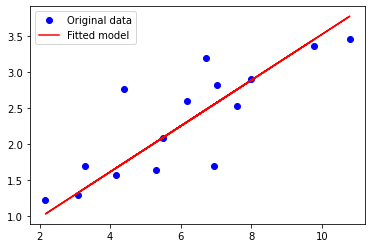

In [5]:
# After training, we can compute the final estimates y_predicted = a*x + b with the trained values for a and b

# We can use the torch.no_grad() wrapper since we don't need to compute gradients anymore (saves memory and time)
with torch.no_grad():
    y_predicted = lin_reg_model(x)

# Move back to numpy for plotting the results
y_predicted_np = y_predicted.numpy()
    
# Plot the graph
plt.plot(x_np, y_np, 'bo', label='Original data')
plt.plot(x_np, y_predicted_np, 'r', label='Fitted model')
plt.legend()
plt.show()

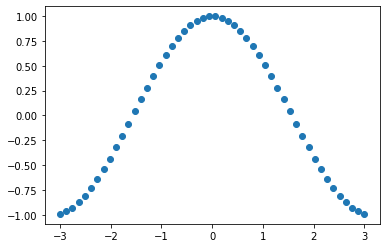

In [26]:
# Non-linear regression.
# Here we generate sinusoidal data, and try to fit a non-linear model on it.

# First, we create the data
x = torch.unsqueeze(torch.linspace(-3, 3, 50), dim=1)
y = torch.cos(x)
plt.scatter(x,y)
plt.show()

In [30]:
# Here we define the model (a first linear layer, a RELU activation, and a second linear layer)

# TO DO: define the 2 linear layers
# layer 1: input_size=1 and output_size=10
# layer 2: input_size=10 and output_size=1
layer1 = torch.nn.Linear(1, 10)
layer2 = torch.nn.Linear(10, 1)

# TO DO: define an activation function (use RELU: https://pytorch.org/docs/stable/nn.html#non-linear-activations-weighted-sum-nonlinearity)
act_fn = torch.nn.ReLU()

# TO DO: Stack the layers into one model
# hint: use torch.nn.Sequential https://pytorch.org/docs/stable/generated/torch.nn.Sequential.html#torch.nn.Sequential
model = torch.nn.Sequential(layer1, act_fn, layer2)


In [31]:
# TO DO: write the training loop (very similar to the linear regression procedure) for 300 epochs and save the model parameters 

# Define the loss function (MSE)
loss_fn = torch.nn.MSELoss() 

# Create the optimizer: (stochastic gradient descent, learning rate = 0.01)
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

# Loop over epochs
num_epochs = 300
for epoch in range(num_epochs):

    # Forward pass: calculate the predicted value with the model
    y_predicted = model(x)
    
    # Compute the error between the true values y and the predicted values
    loss = loss_fn(y, y_predicted)
    
    # Get ridd of the gradients that have been calculated before (just to be sure)
    optimizer.zero_grad()
    
    # Use the backward method to compute the gradient of the loss with respect to the model parameters
    loss.backward()
    
    # Apply the gradient descent algorithm
    optimizer.step()
    
    # Print the loss
    print('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, loss.item()))
        
# Save the trained model parameters
torch.save(lin_reg_model.state_dict(), 'model_nonlinear_regression.pt')

Epoch [1/300], Loss: 0.7685
Epoch [2/300], Loss: 0.7285
Epoch [3/300], Loss: 0.6925
Epoch [4/300], Loss: 0.6600
Epoch [5/300], Loss: 0.6306
Epoch [6/300], Loss: 0.6038
Epoch [7/300], Loss: 0.5793
Epoch [8/300], Loss: 0.5569
Epoch [9/300], Loss: 0.5363
Epoch [10/300], Loss: 0.5173
Epoch [11/300], Loss: 0.4998
Epoch [12/300], Loss: 0.4835
Epoch [13/300], Loss: 0.4684
Epoch [14/300], Loss: 0.4543
Epoch [15/300], Loss: 0.4411
Epoch [16/300], Loss: 0.4288
Epoch [17/300], Loss: 0.4172
Epoch [18/300], Loss: 0.4064
Epoch [19/300], Loss: 0.3961
Epoch [20/300], Loss: 0.3864
Epoch [21/300], Loss: 0.3773
Epoch [22/300], Loss: 0.3686
Epoch [23/300], Loss: 0.3604
Epoch [24/300], Loss: 0.3526
Epoch [25/300], Loss: 0.3452
Epoch [26/300], Loss: 0.3381
Epoch [27/300], Loss: 0.3313
Epoch [28/300], Loss: 0.3249
Epoch [29/300], Loss: 0.3187
Epoch [30/300], Loss: 0.3127
Epoch [31/300], Loss: 0.3071
Epoch [32/300], Loss: 0.3016
Epoch [33/300], Loss: 0.2963
Epoch [34/300], Loss: 0.2913
Epoch [35/300], Loss: 0

Epoch [300/300], Loss: 0.0121


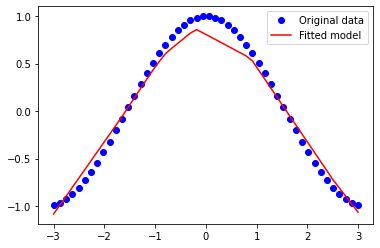

In [32]:
# TO DO: Now, test the model: Compute the predicted outputs, and plot the results (original data and fitted model)
with torch.no_grad():
    y_predicted = model(x)

# Move back x, y and y_predicted to numpy
y_predicted_np = y_predicted.numpy()
x_np = x.numpy()
y_np = y.numpy()
    
# Plot the results (original data and fitted model)
plt.plot(x_np, y_np, 'bo', label='Original data')
plt.plot(x_np, y_predicted_np, 'r', label='Fitted model')
plt.legend()
plt.show()